## 2-canyon run, Astoria base, higher N - lower U

Calibration for probes from 06 Jul 2019 (https://nbviewer.jupyter.org/urls/bitbucket.org/canyonsubc/multipleCanyons/raw/tip/lab/Conduino/Calibration/notebooks/ANK_P20_probes_03jul19.ipynb).

### General description
Although not many particles sank, there aren't very many on the videos.

### Notes:

Reference picture:  69.93 pix/cm

### Stratification
800 g salt bucket 1 (Started filling at 10:05, ended 11:40)

$\rho_{b1}=1.029852$ g cm$^{-3}$ at 20.001  deg C at 10:10 

$\rho_{b2}=0.99898 $ g cm$^{-3}$ at 20.020  deg C

### Rotation and forcing

|$f$| rad s$^{-1}$|$\Delta t$ /s|Description|
|::|::|::|::|
|$f_0$|0.50| - |background, spin up  |
|$f_1$|0.53|21|ramp up|
|$f_2$|0.57|50|avoid spin down|
|$f_2$ to $f_0$|-|15 min|ramp down to background $f$|

### Conduino
* run01 - experiment01.mat

### PIV
* Light sheet depths 2.9 cm, 4.1 cm and 5.7 cm

run01 video - starts at   sec

run02 video starts at  sec

### Density samples

**run01** (13:15)

|Density/g cm$^{-3}$|Temperature/$^{\circ}$C|Depth/cm|
|::|::|::|
|1.007580|20.001| surface|
|1.01798|20.005|3.0 |
|1.02913|20.009|9.6 |

**run02** (15:05)

|Density/g cm$^{-3}$|Temperature/$^{\circ}$C|Depth/cm|
|::|::|::|
|1.01007|20.023| surface|
|1.01658|20.020|3.0|
|1.02841|20.014|9.6|

 **run03** (16:20)

|Density/g cm$^{-3}$|Temperature/$^{\circ}$C|Depth/cm|
|::|::|::|
|1.00995|20.014| surface|
|1.01672|20.006|3.0|
|1.02843|20.004|9.6|

### Profiler
*  13:15, run01 file - `profile01.mat`
*  15:05, run02 file - `profile02.mat`
*  16:20, run03 file - `profile03.mat`

In [124]:
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import os
import pandas as pd
#import seaborn as sns
import scipy.io as sio
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts')
import conduino_tools as ctools
import profiler_tools as ptools


In [123]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [78]:
def plot_uprofile(ax, col='0.8'):
    ax.axvline(21.0, color=col, linestyle=':')
    ax.axvline(71.0, color=col, linestyle=':')
    ax.axvline(0.0, color=col, linestyle=':')
        
def plot_forcing(ax, file, f0, f1, f2, t0, t1):
    '''ax: axes to plot figure on
       file: experiment file to extract time
       f0: Angular velocity of the table during spin up
       f1: f at max forcing
       f2: f to avoid spin down
       t0: time to get to f1
       t1: time to get to f2'''
    mat = sio.loadmat(file, squeeze_me=True)
    time = mat['time']
    t2 = np.round(np.max(time),2) # s

    ax0.text(0.3,0.3,r'$\Delta f_1=$%1.2f rad/s, $\Delta t_1=$%1.1f s' %((f1-f0),t0), transform=ax0.transAxes)
    ax0.text(0.5,0.7,r'$\Delta f_2=$%1.2f rad/s, $\Delta t_2=$%1.1f s' %((f2-f1),(t1-t0)), transform=ax0.transAxes)

    ax0.plot([0,t0,t1,t2],[f0,f1,f2,f2], 'g-')
    ax0.set_ylabel('f table / rad s$^{-1}$')
    ax0.set_xlabel('time / s')

Probes ANK1 upstream and ANK2 downstream. Both near head

|Channel|Probe|
|::|::|
|'ch1':|ANK1|
|'ch2':|ANK2|
|'ch3':|P20|



### Forcing

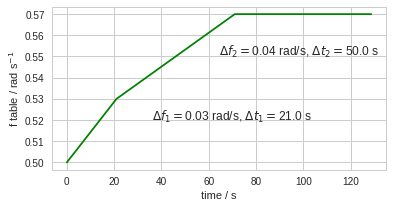

In [5]:
fig, ax0 = plt.subplots(1,1, figsize=(6,3), sharex=True)

f0 = 0.50 # initial f rad/s
f1 = 0.53 # rad/s
f2 = 0.57 # rad/s
t0 = 21.0 # s
t1 = 71.0 # s
exp_file = '../experiments/exp_08jul19/experiment01.mat'

plot_forcing(ax0, exp_file, f0, f1, f2, t0, t1)

### All readings 

Text(0.5,0,'time / s')

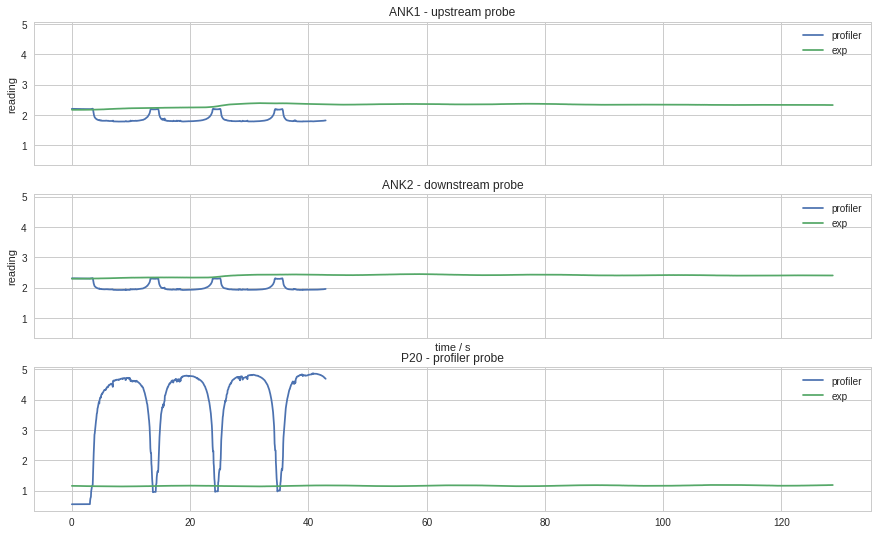

In [6]:
fig, (ax0,ax1, ax2) = plt.subplots(3,1, figsize=(15,9), sharex=True, sharey=True)

labels = [ 'profiler', 'exp', 'profiler2', 'exp2']

filepaths = ['../experiments/exp_08jul19/profile01.mat',
             '../experiments/exp_08jul19/experiment01.mat',
             #'../experiments/exp_08jul19/profile02.mat',
             #'../experiments/exp_08jul19/experiment02.mat',
             #'../experiments/exp_08jul19/profile03.mat',
             #'../experiments/exp_08jul19/experiment03.mat',
             ]

for filepath, lab in zip(filepaths, labels):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    P3 = mat['ch3']
    time = mat['time']
    ax0.plot(time,P1, label=lab)
    ax1.plot(time,P2, label=lab)
    ax2.plot(time,P3, label=lab)

ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))
ax2.legend(bbox_to_anchor=(1,1))

ax1.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_ylabel('reading')#'density / g cm$^{-3}$')
ax0.set_title('ANK1 - upstream probe')
ax1.set_title('ANK2 - downstream probe')
ax2.set_title('P20 - profiler probe')

ax1.set_xlabel('time / s')

### Profiles

(0, 45)

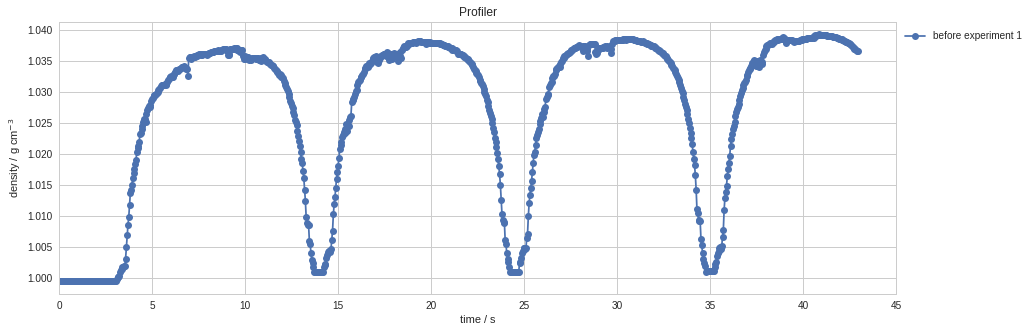

In [7]:
fig, (ax0) = plt.subplots(1,1, figsize=(15,5), sharex=True)
labels=['before experiment 1', 'before experiment 2','before experiment 3']

filepaths = ['../experiments/exp_08jul19/profile01.mat',
             #'../experiments/exp_08jul19/profile02.mat',
             #'../experiments/exp_08jul19/profile03.mat',
             ]
ind_offset = [0,5,30]
for filepath, lab, ind in zip(filepaths, labels, ind_offset):
    mat = sio.loadmat(filepath, squeeze_me=True)
    P3 = mat['ch3']# dens_B(mat['ch1'])
    time = mat['time']
    densP3 = ctools.densP_06Jul19(P3)
    
    ax0.plot(time[ind:]-time[ind],densP3[ind:],'o-', label=lab)

ax0.legend(bbox_to_anchor=(1,1))

ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('Profiler')
ax0.set_xlabel('time / s')
ax0.set_xlim(0,45)

### Experiment

../experiments/exp_08jul19/experiment01.mat


Text(0.5,0,'sample')

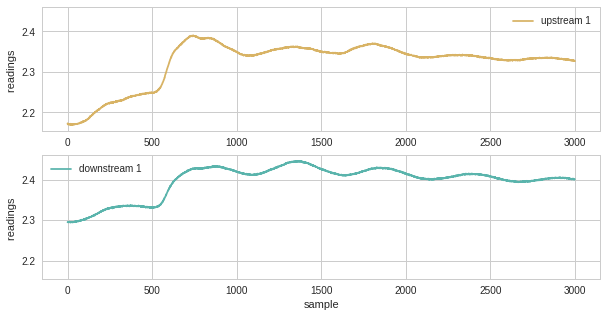

In [8]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,5), sharey=True)
labels = [['upstream 1','downstream 1'],['upstream 2', 'downstream 2'],['upstream 3', 'downstream 3']]
colors = ['#d8b365','#5ab4ac']
linestyles = ['-', '--',':']
files = ['../experiments/exp_08jul19/experiment01.mat',
         #'../experiments/exp_08jul19/experiment02.mat',
         #'../experiments/exp_08jul19/experiment03.mat'
]
for filepath, lab, sty in zip(files, labels, linestyles):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    ax0.plot(P1,'-', label=lab[0], color=colors[0], linestyle=sty)
    ax1.plot(P2,'-', label=lab[1], color=colors[1], linestyle=sty)
ax0.legend(loc=0)
ax1.legend(loc=0)
ax0.set_ylabel('readings ')
ax1.set_ylabel('readings ')
ax1.set_xlabel('sample')

../experiments/exp_08jul19/experiment01.mat


Text(0.5,1,'Probe density')

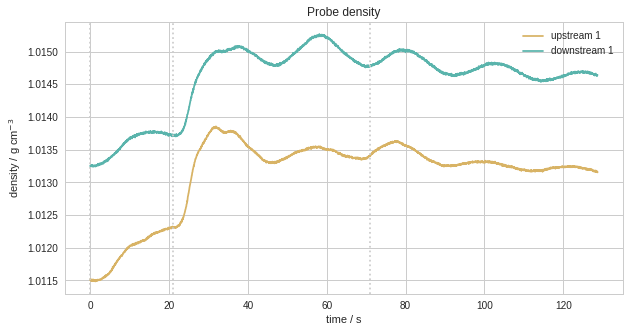

In [79]:
fig, ax0 = plt.subplots(1,1, figsize=(10,5), sharey=True)
labels = [['upstream 1','downstream 1'],['upstream 2', 'downstream 2'],['upstream 3', 'downstream 3']]
colors = ['#d8b365','#5ab4ac']
linestyles = ['-', '--',':']
files = ['../experiments/exp_08jul19/experiment01.mat',
         #'../experiments/exp_08jul19/experiment02.mat',
         #'../experiments/exp_08jul19/experiment03.mat'
        ]

for filepath, lab, sty in zip(files, labels, linestyles):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    ax0.plot(time,ctools.densANK1_06Jul19(P1),'-', label=lab[0], color=colors[0], linestyle=sty)
    ax0.plot(time,ctools.densANK2_06Jul19(P2),'-', label=lab[1], color=colors[1], linestyle=sty)

plot_uprofile(ax0)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density')


../experiments/exp_08jul19/experiment01.mat


Text(0.5,1,'Probe density minus initial density')

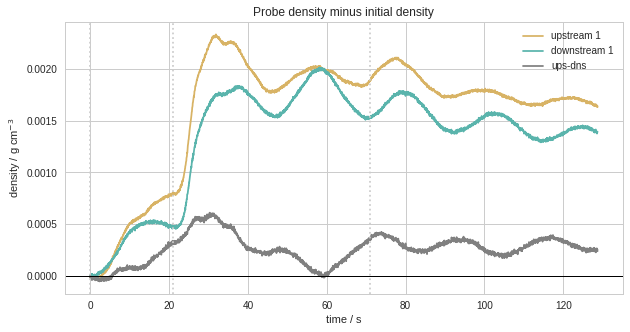

In [80]:
fig, (ax0) = plt.subplots(1,1, figsize=(10,5), sharey=True)

labels = [['upstream 1','downstream 1'],['upstream 2', 'downstream 2'],['upstream 3', 'downstream 3']]
colors = ['#d8b365','#5ab4ac']
linestyles = ['-', '--',':']
files = ['../experiments/exp_08jul19/experiment01.mat',
         #'../experiments/exp_08jul19/experiment02.mat',
         #'../experiments/exp_08jul19/experiment03.mat']
]
for filepath, lab, sty in zip(files, labels, linestyles):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    ax0.plot(time,ptools.densANK1_06Jul19(P1)-ctools.densANK1_06Jul19(P1)[0],'-', 
             label=lab[0], color=colors[0], linestyle=sty)
    ax0.plot(time,ptools.densANK2_06Jul19(P2)-ctools.densANK2_06Jul19(P2)[0],'-', 
             label=lab[1], color=colors[1], linestyle=sty)
    ax0.plot(time,((ctools.densANK1_06Jul19(P1)-ctools.densANK1_06Jul19(P1)[0])-
                   (ctools.densANK2_06Jul19(P2)-ctools.densANK2_06Jul19(P2)[0])),
             '-', label='ups-dns',linestyle=sty, color='0.5')

plot_uprofile(ax0)
ax0.axhline(0,color='k', linewidth=1)
ax0.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_title('Probe density minus initial density')


In [108]:
# this function is now saved in conduino_tools.py
def filter_freq(time, data, f):
    #inertial_period = (2*np.pi)/f
    ine_freq = f#1/(inertial_period) 
    x0 = np.ones_like(time)
    x1 = np.cos(2*np.pi*ine_freq*time)
    x2 = np.sin(2*np.pi*ine_freq*time)
    Yh = np.zeros_like(time)
    X = np.array([x0, x1, x2]) 

    D = np.matmul(X,np.transpose(X))
    Y = np.matmul(X,np.transpose(data-np.mean(data)))
    B = np.matmul(np.linalg.inv(D),Y), # regression coefficients.
    Yh = B[0][0] + B[0][1]*x1 + B[0][2]*x2
    Yr = data - Yh # Resiudual
    return Yr, Yh

../experiments/exp_08jul19/experiment01.mat


Text(0.5,0,'time / s')

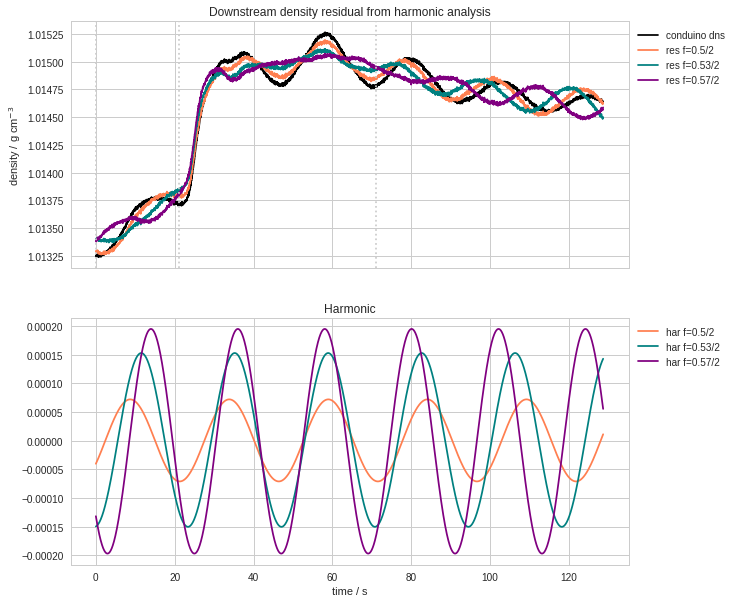

In [120]:
fig, (ax0, ax1) = plt.subplots(2,1, figsize=(10,10), sharex=True)

colors = ['#d8b365','#5ab4ac']
linestyles = ['-', '--',':']
files = ['../experiments/exp_08jul19/experiment01.mat',
        ]

for filepath, lab, sty in zip(files, labels, linestyles):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    dt = mat['dt']
    density_ups = ctools.densANK1_06Jul19(P1)
    density_dns = ctools.densANK2_06Jul19(P2)
    
    
    f0 = (0.50/2)/(2*np.pi) # f/2 is omega, table speed in rad/s, /2pi to get rid of rad
    f1 = (0.53/2)/(2*np.pi) 
    f2 = (0.57/2)/(2*np.pi)
    res0, har0 = filter_inertial(time,density_dns,f0)
    res1, har1 = filter_inertial(time,density_dns,f1)
    res2, har2 = filter_inertial(time,density_dns,f2)
    
    ax0.plot(time,density_dns,'-', 
             label='conduino dns', color='k', linestyle=sty)
    ax0.plot(time,res0,'-', 
             label='res f=0.5/2', color='coral', linestyle=sty)
    ax0.plot(time,res1,'-', 
             label='res f=0.53/2', color='teal', linestyle=sty)
    ax0.plot(time,res2,'-', 
             label='res f=0.57/2', color='purple', linestyle=sty)
    ax1.plot(time,har0,'-', 
             label='har f=0.5/2', color='coral', linestyle=sty)
    ax1.plot(time,har1,'-', 
             label='har f=0.53/2', color='teal', linestyle=sty)
    ax1.plot(time,har2,'-', 
             label='har f=0.57/2', color='purple', linestyle=sty)
    
    
plot_uprofile(ax0)
ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('Downstream density residual from harmonic analysis')
ax1.set_title('Harmonic')
ax1.set_xlabel('time / s')


../experiments/exp_08jul19/experiment01.mat


Text(0.5,0,'time / s')

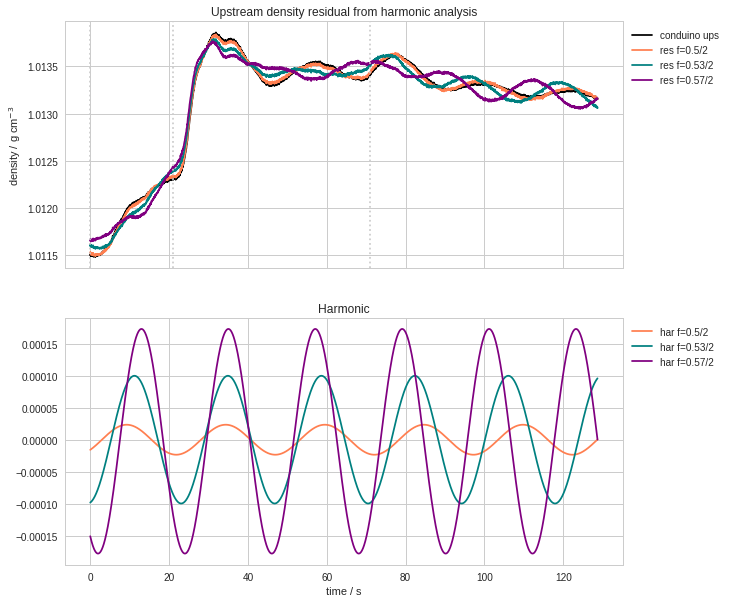

In [126]:
fig, (ax0, ax1) = plt.subplots(2,1, figsize=(10,10), sharex=True)

colors = ['#d8b365','#5ab4ac']
linestyles = ['-', '--',':']
files = ['../experiments/exp_08jul19/experiment01.mat',
        ]

for filepath, lab, sty in zip(files, labels, linestyles):
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    P1 = mat['ch1']
    P2 = mat['ch2']
    time = mat['time']
    dt = mat['dt']
    density_ups = ctools.densANK1_06Jul19(P1)
    density_dns = ctools.densANK2_06Jul19(P2)
    
    
    f0 = (0.50/2)/(2*np.pi) # f/2 is omega, table speed in rad/s, /2pi to get rid of rad
    f1 = (0.53/2)/(2*np.pi) 
    f2 = (0.57/2)/(2*np.pi)
    res0, har0 = filter_inertial(time,density_ups,f0)
    res1, har1 = filter_inertial(time,density_ups,f1)
    res2, har2 = filter_inertial(time,density_ups,f2)
    
    ax0.plot(time,density_ups,'-', 
             label='conduino ups', color='k', linestyle=sty)
    ax0.plot(time,res0,'-', 
             label='res f=0.5/2', color='coral', linestyle=sty)
    ax0.plot(time,res1,'-', 
             label='res f=0.53/2', color='teal', linestyle=sty)
    ax0.plot(time,res2,'-', 
             label='res f=0.57/2', color='purple', linestyle=sty)
    ax1.plot(time,har0,'-', 
             label='har f=0.5/2', color='coral', linestyle=sty)
    ax1.plot(time,har1,'-', 
             label='har f=0.53/2', color='teal', linestyle=sty)
    ax1.plot(time,har2,'-', 
             label='har f=0.57/2', color='purple', linestyle=sty)
    
    
plot_uprofile(ax0)
ax0.legend(bbox_to_anchor=(1,1))
ax1.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('density / g cm$^{-3}$')
ax0.set_title('Upstream density residual from harmonic analysis')
ax1.set_title('Harmonic')
ax1.set_xlabel('time / s')
